<a href="https://colab.research.google.com/github/ghanbarzadeh/Course_MachineVision_2021/blob/master/CHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget -O 'sunflowers.jpg' 'https://i1.wp.com/cdn-images-1.medium.com/max/800/1*ZoJgAJm_JYlk2re4yqXPxw.jpeg?w=750&ssl=1'

--2021-11-04 14:16:11--  https://i1.wp.com/cdn-images-1.medium.com/max/800/1*ZoJgAJm_JYlk2re4yqXPxw.jpeg?w=750&ssl=1
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60604 (59K) [image/jpeg]
Saving to: ‘sunflowers.jpg’

sunflowers.jpg      100%[===================>]  59.18K  --.-KB/s    in 0.001s  

2021-11-04 14:16:11 (52.4 MB/s) - ‘sunflowers.jpg’ saved [60604/60604]



In [15]:
img = cv2.imread("/content/sunflowers.jpg",0) #gray scale conversion
img = img/255.0  #image normalization

In [59]:
# We will always use a filter size of 101*101 since computation is cheap!!
def LoG(sigma):
    d = 101
    filter = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            x = i-(d-1)/2
            y = j-(d-1)/2
            filter[i, j] = -1/np.pi/sigma**2*(1-(x**2+y**2)/2/sigma**2)*np.exp(-(x**2+y**2)/2/sigma**2)
    return filter

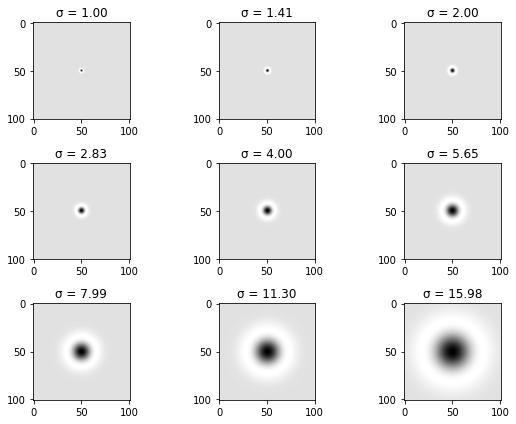

In [60]:
fig, ax = plt.subplots(3, 3, figsize=(8, 6))
for i in range(9):
    ax[np.unravel_index(i, (3, 3))].imshow(LoG(np.power(1.414,i)), cmap='gray')
    ax[np.unravel_index(i, (3, 3))].set_title(f'σ = {np.power(1.414,i):.2f}')
fig.tight_layout()

In [61]:
# 1D filter
def LoG_1D(x, sigma):
    filter = np.zeros(x.shape)
    filter = -1/np.pi/sigma**4*(1-(x**2)/2/sigma**2)*np.exp(-(x**2)/2/sigma**2)
    return filter

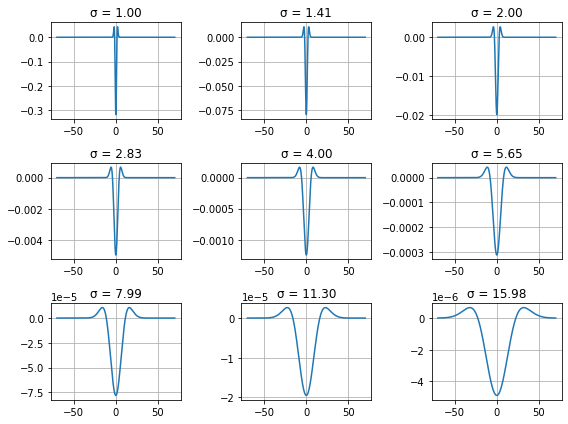

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(8, 6))
x = np.arange(-70, 70, 0.1)
for i in range(9):
    ax[np.unravel_index(i, (3, 3))].plot(x, LoG_1D(x, np.power(1.414,i)))
    ax[np.unravel_index(i, (3, 3))].set_title(f'σ = {np.power(1.414,i):.2f}')
    ax[np.unravel_index(i, (3, 3))].grid()
fig.tight_layout()

In [63]:
# %%time
k = 1.414
sigma_start = 1.0
def LoG_convolve(img):
    log_images = [] #to store responses
    for i in range(0,9):
        sigma =  sigma_start * np.power(k,i) #sigma 
        filter = LoG(sigma) #filter generation
        image = cv2.filter2D(img,-1,filter) # convolving image
        image = np.pad(image,((1,1),(1,1)),'constant') #padding 
        image = np.square(image) 
        log_images.append(image)
    return np.array(log_images) 
log_image = LoG_convolve(img)

In [64]:
# %%time
def detect_blob(log_image):
    coordinates = [] #to store coordinates
    (h,w) = img.shape
    for i in range(1,h):
        for j in range(1,w):
            slice_img = log_image[:, i-1:i+2, j-1:j+2] #9*3*3 slice
            result = np.max(slice_img) #finding maximum
            if result >= 0.03: #threshold
                z, x, y = np.unravel_index(slice_img.argmax(),slice_img.shape)
                coordinates.append((i+x-1, j+y-1, sigma_start * np.power(k, z)))
    return coordinates
coordinates = list(set(detect_blob(log_image)))

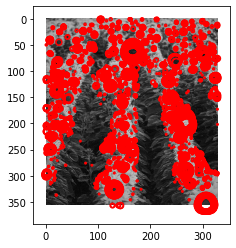

In [65]:
fig, ax = plt.subplots()
nh,nw = img.shape
ax.imshow(img, cmap="gray")
for blob in coordinates:
    y,x,s = blob
    c = plt.Circle((x, y), s*1.414, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.plot()
plt.show()